Number of ships : 1000
Average harbor time (Wait+Unload) : 86
Maximum harbor time : 227
Average waiting time : 22
Maximum waiting time : 161


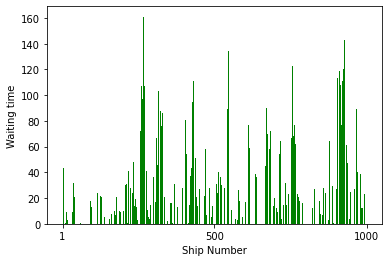

In [2]:
import random
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


N = int(input("Number of ships : "))                                     

def random_between_time():                          
    x = random.random()
    if x >= 0.99:
        b = 1500*x-1355
        count_between[12] = count_between[12]+1
    elif x >= 0.97:
        b = 500*x-365
        count_between[11] = count_between[11]+1
    elif x >= 0.94:
        b = 333.3*x-203.3
        count_between[10] = count_between[10]+1
    elif x >= 0.90:
        b = 250*x-125
        count_between[9] = count_between[9]+1
    elif x >= 0.84:
        b = 166.7*x-50
        count_between[8] = count_between[8]+1
    elif x >= 0.70:
        b = 71.4*x+30
        count_between[7] = count_between[7]+1
    elif x >= 0.45:
        b = 40*x+52
        count_between[6] = count_between[6]+1
    elif x >= 0.26:
        b = 52.6*x+46.3
        count_between[5] = count_between[5]+1
    elif x >= 0.14:
        b = 83.3*x+38.3
        count_between[4] = count_between[4]+1
    elif x >= 0.07:
        b = 142.9*x+30.0
        count_between[3] = count_between[3]+1
    elif x >= 0.03:
        b = 250*x+22.5
        count_between[2] = count_between[2]+1
    elif x >= 0.01:
        b = 500*x+15
        count_between[1] = count_between[1]+1
    else:
        b = 500*x+15
        count_between[0] = count_between[0]+1
    return b


def random_unload_time():
    x = random.random()
    if x >= 0.99:
        u = 750*x-660
        count_unload[8] = count_unload[8]+1
    elif x >= 0.94:
        u = 100*x-16.5
        count_unload[7] = count_unload[7]+1
    elif x >= 0.85:
        u = 55.6*x+25.3
        count_unload[6] = count_unload[6]+1
    elif x >= 0.71:
        u = 35.7*x+42.1
        count_unload[5] = count_unload[5]+1
    elif x >= 0.41:
        u = 16.7*x+55.7
        count_unload[4] = count_unload[4]+1
    elif x >= 0.18:
        u = 21.7*x+53.6
        count_unload[3] = count_unload[3]+1
    elif x >= 0.07:
        u = 45.5*x+49.3
        count_unload[2] = count_unload[2]+1
    elif x >= 0.02:
        u = 100*x+45.5
        count_unload[1] = count_unload[1]+1
    else:
        u = 125*x+45
        count_unload[0] = count_unload[0]+1
    return u

between = [0]*N
arrive = [0]*N
unload = [0]*N
start = [0]*N
idle = [0]*N
wait = [0]*N
finish = [0]*N
harbor = [0]*N
count_between = [0]*13
count_unload = [0]*9

between[0] = random_between_time()
unload[0] = random_unload_time()
arrive[0] = between[0]
HARTIME = unload[0]
MAXHAR = unload[0]
WAITIME = 0
MAXWAIT = 0
IDLETIME = arrive[0]
finish[0] = arrive[0]+unload[0]

for i in range(1,N):
    between[i] = random_between_time()
    unload[i] = random_unload_time()
    arrive[i] = arrive[i-1]+between[i]
    timediff = arrive[i]-finish[i-1]
    if timediff >= 0:
        idle[i] = timediff
        wait[i] = 0
    else:
        idle[i] = 0
        wait[i] = -1*timediff
    start[i] = arrive[i] + wait[i]
    finish[i] = start[i] + unload[i]
    harbor[i] = wait[i] + unload[i]
    HARTIME = HARTIME + harbor[i]
    if harbor[i] > MAXHAR:
        MAXHAR = harbor[i]
    WAITIME = WAITIME + wait[i]
    IDLETIME = IDLETIME + idle[i]
    if wait[i] > MAXWAIT:
        MAXWAIT = wait[i]

AVG_WAITIME = WAITIME/N     # average waiting time
AVG_HARTIME = HARTIME/N     # average harbor time

# print simulation results
print("Average harbor time (Wait+Unload) : %d" %AVG_HARTIME)
print("Maximum harbor time : %d" %MAXHAR)
print("Average waiting time : %d" %AVG_WAITIME)
print("Maximum waiting time : %d" %MAXWAIT)

# plot waiting time for each ship
fig, ax = plt.subplots()
queue_number = range(1,N+1)
x_pos = N
y = []
for i in wait:
    y.append(int(i))

ax.bar(queue_number, y , align='center',color='green')
ax.set_xticks([1,int(N/2),N])
ax.set_xticklabels([1,int(N/2),N])
ax.set_ylabel('Waiting time')
ax.set_xlabel('Ship Number')

plt.savefig('waiting.eps', format='eps')

plt.show()